## Contents
***
1. Assigning working directory
2. Importing the necessary libraries
3. Importing the data
4. Exploratory data analysis (EDA)
    * Basic commands
    * Exploring categorical variables
    * Exploring numerical variables
5. Imputing Missing Values
6. Feature Engineering
7. Relation between columns
8. Pair Plot
9. Conclusion

## Assigning working directory

In [1]:
import os
os.chdir('C:/Users/Darshan/Desktop/cereals_mini_project')

## Importing the necessary libraries

In [2]:
# Libraries for data manupulation
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This is an optional argument only used for jupyter notebook users
%matplotlib inline

# Using a custom style for visualisation
# To see all the custom styles available input: 'plt.style.available'
plt.style.use('fivethirtyeight')

## Importing the data

In [3]:
# Importing the main dataset
cereals = pd.read_csv('C:/Users/Darshan/Desktop/cereals_mini_project/cereals_data.csv')

In [4]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [5]:
# Importing the description of the main dataset
cer_des = pd.read_excel('C:/Users/Darshan/Desktop/cereals_mini_project/Cereals_description.xlsx', header=None)

In [6]:
cer_des.head(15)

,0
0,1. Name: Name of cereal
1,2. mfr: Manufacturer of cereal where A = Ameri...
2,3. type: cold or hot
3,4. calories: calories per serving
4,5. protein: grams of protein
5,6. fat: grams of fat
6,7. sodium: milligrams of sodium
7,8. fiber: grams of dietary fiber
8,9. carbo: grams of complex carbohydrates
9,10. sugars: grams of sugars


## Exploratory Data Analysis

### Basic Commands
1. shape
2. info()
3. head()
4. columns
5. unique()
6. describe()

In [7]:
# This function returns the first n rows for the object based on position. 
# It is useful for quickly testing if your object has the right type of data in it.

# The default n value is 5

cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [8]:
# Return a tuple representing the dimensionality of the DataFrame.

cereals.shape

(77, 16)

In [9]:
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [10]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of 
# a dataset’s distribution, excluding NaN values.

cereals.describe().T
# Here it will only show the numerical features

# The .T returns the transpose.

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [11]:
# Returns the column labels of the DataFrame.

cereals.columns


Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [12]:
# This code will execute the .isnull() first, which will return boolean values(True where Null is present 
# and False where Null is absent). After that the .sum() will count all the True values.

cereals.isnull().sum()
# We can see that there are null values in 'sugar','potass','carbo'

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

### Exploring categorical variable

#### name

In [13]:
# Returns the unique values in the 'name' column

cereals['name'].unique()


array(['100%_Bran', '100%_Natural_Bran', 'All-Bran',
       'All-Bran_with_Extra_Fiber', 'Almond_Delight',
       'Apple_Cinnamon_Cheerios', 'Apple_Jacks', 'Basic_4', 'Bran_Chex',
       'Bran_Flakes', "Cap'n'Crunch", 'Cheerios', 'Cinnamon_Toast_Crunch',
       'Clusters', 'Cocoa_Puffs', 'Corn_Chex', 'Corn_Flakes', 'Corn_Pops',
       'Count_Chocula', "Cracklin'_Oat_Bran", 'Cream_of_Wheat_(Quick)',
       'Crispix', 'Crispy_Wheat_&_Raisins', 'Double_Chex', 'Froot_Loops',
       'Frosted_Flakes', 'Frosted_Mini-Wheats',
       'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats', 'Fruitful_Bran',
       'Fruity_Pebbles', 'Golden_Crisp', 'Golden_Grahams',
       'Grape_Nuts_Flakes', 'Grape-Nuts', 'Great_Grains_Pecan',
       'Honey_Graham_Ohs', 'Honey_Nut_Cheerios', 'Honey-comb',
       'Just_Right_Crunchy__Nuggets', 'Just_Right_Fruit_&_Nut', 'Kix',
       'Life', 'Lucky_Charms', 'Maypo',
       'Muesli_Raisins,_Dates,_&_Almonds',
       'Muesli_Raisins,_Peaches,_&_Pecans', 'Mueslix_Crispy_Blend',
  

In [14]:
# Returns the number of unique elements in the 'name' colulmn

cereals.name.nunique()


77

#### mfr

In [15]:
# Return a Series containing counts of unique values.

# The resulting object will be in descending order so that the first element is the most frequently-occurring element.

# Excludes NA values by default.


cereals.mfr.value_counts()


K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64

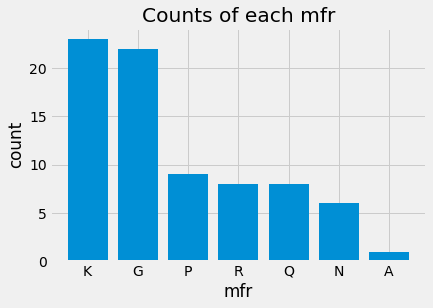

In [16]:
# Lets visualize the mfr column with a barplot
plt.bar(cereals.mfr.value_counts().index.values,cereals.mfr.value_counts().values)

# This line will create a title for the plot
plt.title('Counts of each mfr')

# This line will label the x-axis
plt.xlabel('mfr')

# This line will label the y-axis
plt.ylabel('count')

# This line will save the plot in the working directory mentioned in the first line of this script.
plt.savefig('plots/1.mfr_count.png')

# We can see that 'K'(Kelloggs) and 'G'(General Mills) have the most cereal products

In [17]:
# pd.options.display.max_colwidth will allow pandas to show long columns
pd.options.display.max_colwidth = 200

# printing the mfr row from the description dataset
print(cer_des.iloc[1])

0    2. mfr: Manufacturer of cereal where A = American Home Food Products; G = General Mills; K = Kelloggs; N = Nabisco; P = Post; Q = Quaker Oats; R = Ralston Purina
Name: 1, dtype: object


#### type

In [18]:
cereals.type.value_counts()

C    74
H     3
Name: type, dtype: int64

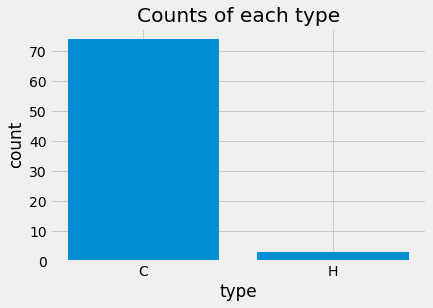

In [19]:
# Barplot to show cold and hot type cereals
plt.bar(cereals.type.value_counts().index.values,cereals.type.value_counts().values)
plt.title('Counts of each type')
plt.xlabel('type')
plt.ylabel('count')
plt.savefig('plots/2.type_count.png')
# Most of the cereals are cold type cereals

In [20]:
# Here we are selecting the type row from the cereals description.
cer_des.iloc[2]

0    3. type: cold or hot
Name: 2, dtype: object

#### shelf

In [21]:
cereals.shelf.value_counts()

3    36
2    21
1    20
Name: shelf, dtype: int64

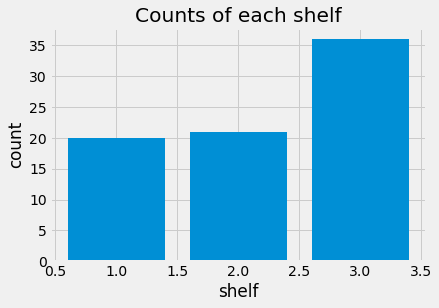

In [22]:
# Barplot on shelf column
plt.bar(cereals.shelf.value_counts().index.values,cereals.shelf.value_counts().values)
plt.title('Counts of each shelf')
plt.xlabel('shelf')
plt.ylabel('count')
plt.savefig('plots/3.shelf_count.png')

In [23]:
# Here we are selecting the shelf row from the cereals description.

cer_des.iloc[12]

0    13. shelf: display shelf (1, 2, or 3, counting from the floor)
Name: 12, dtype: object

#### Observations
- Majority of cereals are of type Cold.
- Most of cereals are made by General Mills and Kellogs.
- Majority of cereals are placed on Top shelf(3) , and Almost equal number of cereals are placed on shelf (2,1) which equal      more than half of the number of Shelf(3)

### Exploring numerical values

In [24]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [25]:
# Selecting the numerical features
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups']

# Looping through the numerical columns and printing necessary statistics like min, max, sum etc...

# Here the enumerate will add an index(0,1,2,3,4....) to the cols list['calories','protein'.....], and we can unpack them
# using the variables 'num' and 'i'. 'num' wil hold the index values and 'i' will hold the list elements.

for num, i in enumerate(cols): 
    print(f'{num}. The Sample Statistics of {i}')
    print('Min: ', cereals[i].min(),'\n',
        'Max: ',cereals[i].max(),'\n',
        'Sum: ', cereals[i].sum(),'\n',
        'Skew: ', cereals[i].skew(),'\n',
        'Std Dev: ', cereals[i].std(),'\n',
        'Kurtosis: ', cereals[i].kurtosis())
    print('\n')

0. The Sample Statistics of calories
Min:  50 
 Max:  160 
 Sum:  8230 
 Skew:  -0.4454067394535457 
 Std Dev:  19.48411905682084 
 Kurtosis:  2.3701459531424245


1. The Sample Statistics of protein
Min:  1 
 Max:  6 
 Sum:  196 
 Skew:  0.7458299159881173 
 Std Dev:  1.0947897484455338 
 Kurtosis:  1.1846559801581495


2. The Sample Statistics of fat
Min:  0 
 Max:  5 
 Sum:  78 
 Skew:  1.1659888304247328 
 Std Dev:  1.0064725594803927 
 Kurtosis:  2.0446551409709315


3. The Sample Statistics of sodium
Min:  0 
 Max:  320 
 Sum:  12295 
 Skew:  -0.5757113513318187 
 Std Dev:  83.83229524009317 
 Kurtosis:  -0.34524266921026925


4. The Sample Statistics of fiber
Min:  0.0 
 Max:  14.0 
 Sum:  165.7 
 Skew:  2.431674992853831 
 Std Dev:  2.3833639643872235 
 Kurtosis:  8.647491676694626


5. The Sample Statistics of carbo
Min:  5.0 
 Max:  23.0 
 Sum:  1125.0 
 Skew:  0.11272588135659965 
 Std Dev:  3.9073255536819733 
 Kurtosis:  -0.33723721198037504


6. The Sample Statistics of s

In [26]:
# A groupby operation involves some combination of splitting the object, applying a function, 
# and combining the results. This can be used to group large amounts of data and compute operations on these groups.

# Here we are grouping the cereals data by two categorical columns( Categorical variables can take on only a limited,
# and usually fixed number of possible values.). The categorical features selected here are 'mfr' and 'shelf'.

# After grouping by 'mfr' and 'shelf' we are counting the number of occurrences of 'name' 

cereals.groupby(['mfr','shelf']).count()['name']


mfr  shelf
A    2         1
G    1         6
     2         7
     3         9
K    1         4
     2         7
     3        12
N    1         3
     2         2
     3         1
P    1         2
     2         1
     3         6
Q    1         1
     2         3
     3         4
R    1         4
     3         4
Name: name, dtype: int64

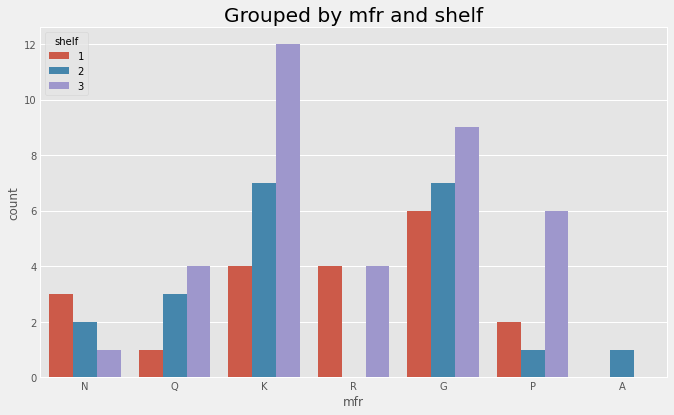

In [27]:
# This line will adjust the size of the plot
plt.figure(figsize=(10,6))

# If you only want to use a style for a specific block of code but don't want to change the global styling,
# the style package provides a context manager for limiting your changes to a specific scope. To isolate your
# styling changes, you can write something like the following:

with plt.style.context('ggplot'):
    sns.countplot(x='mfr',hue='shelf',data=cereals)
plt.title('Grouped by mfr and shelf')
plt.savefig('plots/4.grouped_mfr_shelf.png')
    
# A count plot can be thought of as a histogram across a categorical, instead of quantitative variable.
# The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.    

In [28]:
# Most of manufacturers have placed more number of cereals on 3rd shelf. General Mills = 9, Kellogs = 12, 
# Post = 6 and Quaker = 4.

# Exception is Nabisco - it has done opposite - More on shelf 1 and least on shelf 3.

# The neutral one is R - 4 on shelf 1 and 4 on shelf 3.

## Imputing Missing Values

In [29]:
# This code will execute the .isnull() first, which will return boolean values(True where Null is present 
# and False where Null is absent). After that the .sum() will count all the True values.

cereals.isnull().sum()

# There are 1 null values for carbo, 1 null for sugars and 2 null for potass.


name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

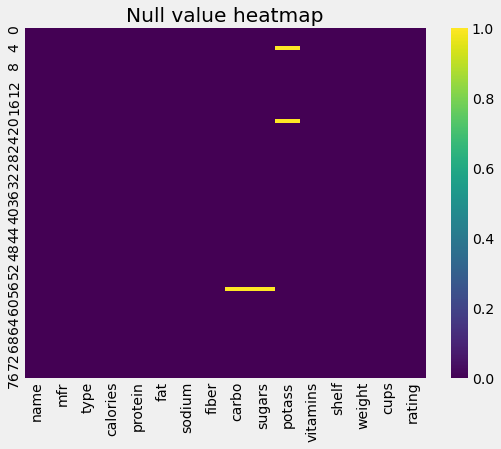

In [30]:
plt.figure(figsize=(8,6))

# Using a heatmap we can plot the null values. cmap is the colormap and here 'viridis' is selected.

sns.heatmap(cereals.isnull(),cmap='viridis')
plt.title('Null value heatmap')
plt.savefig('plots/5.null_heatmap.png')

# Here the yellow color shows all the null values in all the columns.

###### Imputing missing values in carbo column

C:\Users\Darshan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Darshan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


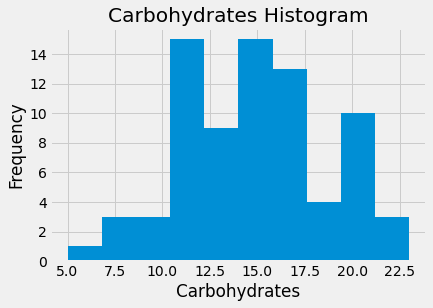

In [31]:
# Here we are constructing a histogram on 'carbo' column of cereals dataframe

# This line will construct the histogram
plt.hist(cereals.carbo)

# This line will create a title for the histogram
plt.title('Carbohydrates Histogram')

# This line will create a label to print on the x-axis
plt.xlabel('Carbohydrates')

# This line will create a label to print on the y-axis
plt.ylabel('Frequency')

# This line will save the plot in the working directory mentioned in the first line of this script.
plt.savefig('plots/6.carbo_hist.png')

In [32]:
# We can see that the most of the vertical bars are near the middle of the plot above. 
# This means that the plot is normally distributed.

# A normall distribution is symmetrical.

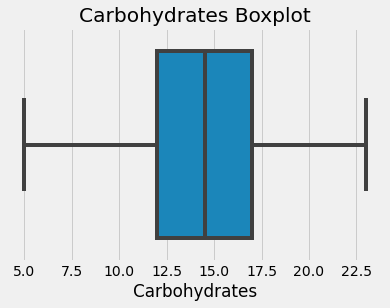

In [33]:
# Here we are ploting a boxplot using the seaborn library.

# This line will create a boxplot on the 'carbo' column.
sns.boxplot(x=cereals.carbo)

# These lines will give title, labels and saves the plot.
plt.title('Carbohydrates Boxplot')
plt.xlabel('Carbohydrates')
plt.savefig('plots/7.carbo_box.png')

In [34]:
# From above plots we can see that the Carbohydrates data lies mostly in the middle itself.
# Therefore to impute the missing values in 'carbo' column we can use mean of the column

In [35]:
# We know that 'carbo' column only has one null value which is under the manufacturer 'Q'(Quaker Oats).

cereals[cereals.carbo.isnull()]


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,110.0,0,1,1.0,0.67,50.828392


In [36]:
# Lets group the data by manufacturer and calculate the mean carbo value for each manufacturer.

cereals.groupby('mfr')['carbo'].mean()

# Here the 'mfr' column is grouped(A,G,K,N,P,Q,R) and the mean of grouped values are calculated.

# Each manufacturer ie 'mfr' has their own cereal products. And all their product must have some common dimensions.
# eg:- The manufacturer 'Q' has 8 products. If we inspect the mean 'carbo' of these 8 products we can see
# 11.57 as the output. Similarly all other manufacturers have their own mean values.

mfr
A    16.000000
G    14.727273
K    15.130435
N    16.000000
P    13.222222
Q    11.571429
R    17.625000
Name: carbo, dtype: float64

In [37]:
# These are the cereal products which are manufactured by 'Q'(Quaker Oats) company.

cereals[cereals.mfr=='Q']

# If we inspect the 'carbo' column below, we can see that all the values lies between 8 and 14.

# We can also see a Nan(not a number) value in the 'carbo' column.
# Our goal is to fill that null with an appropriate value.

# We could fill that null with the overall mean of the 'carbo' column which amounts to 14.802632.

# But as we can see all the values of 'mfr' 'Q'(Quaker Oats) lies between 8 and 14. If we fill the null with 14.802632
# it would become an extreme value in this category.

# To avoid this extreme value insersion, we are replacing the null value with the mean of 'mfr' 'Q'(Quaker Oats) which is
# 11.571429.

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12.0,35.0,25,2,1.0,0.75,18.042851
35,Honey_Graham_Ohs,Q,C,120,1,2,220,1.0,12.0,11.0,45.0,25,2,1.0,1.00,21.871292
41,Life,Q,C,100,4,2,150,2.0,12.0,6.0,95.0,25,2,1.0,0.67,45.328074
54,Puffed_Rice,Q,C,50,1,0,0,0.0,13.0,0.0,15.0,0,3,0.5,1.00,60.756112
55,Puffed_Wheat,Q,C,50,2,0,0,1.0,10.0,0.0,50.0,0,3,0.5,1.00,63.005645
56,Quaker_Oat_Squares,Q,C,100,4,1,135,2.0,14.0,6.0,110.0,25,3,1.0,0.50,49.511874
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,110.0,0,1,1.0,0.67,50.828392


In [38]:
# Lets just see the summary statistics of 'carbo' column where 'mfr' is 'Q'(Quaker Oats)
# Here the extreme values are 8(min) and 14(max)
cereals[cereals.mfr=='Q']['carbo'].describe()

count     7.000000
mean     11.571429
std       1.988060
min       8.000000
25%      11.000000
50%      12.000000
75%      12.500000
max      14.000000
Name: carbo, dtype: float64

In [39]:
# Lets look at the summary statistics of 'carbo' column (complete)
# We can see here that the extreme values are 5 and 23.
cereals.carbo.describe()

count    76.000000
mean     14.802632
std       3.907326
min       5.000000
25%      12.000000
50%      14.500000
75%      17.000000
max      23.000000
Name: carbo, dtype: float64

In [40]:
# From the above exploration we can see that instead of using the mean of the whole 'carbo' column we can use the mean
# of only the values where the 'mfr' is 'Q'(Quaker Oats) which is 11.571429.

In [41]:
# .fillna() will fill NA/NaN values using the specified method.

# Here we are selecting only the carbo column from cereals to fill the Null values.

# cereals[cereals.mfr=='Q']['carbo'].mean() will give us the mean of 'carbo' where 'mfr' is 'Q'(Quaker Oats)

# inplace : bool, default--False
# If True, fill in-place. Note: this will modify any other views on this object 
#     (e.g., a no-copy slice for a column in a DataFrame).

cereals.carbo.fillna(cereals[cereals.mfr=='Q']['carbo'].mean(),inplace=True)

In [42]:
cereals.isnull().sum()

# We can see that now there are no missing values in the carbo column

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [43]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


###### Imputing missing values in sugars column

C:\Users\Darshan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Darshan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


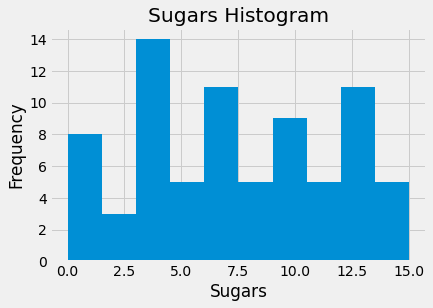

In [44]:
# Construction of a histogram using the 'sugars' column

plt.hist(cereals.sugars)
plt.title('Sugars Histogram')
plt.xlabel('Sugars')
plt.ylabel('Frequency')
plt.savefig('plots/8.sugars_hist.png')

In [45]:
# We can see from above that our Histogram is in a COMB DISTRIBUTION,
# (In a comb distribution, the bars are alternately tall and short. This distribution often results from rounded-off data)

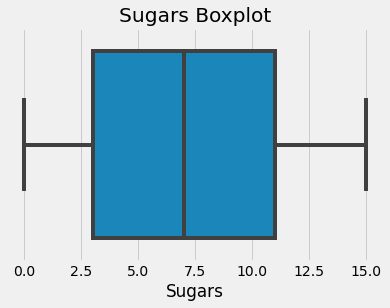

In [46]:
# Constructing a boxplot on 'sugars' column

sns.boxplot(x=cereals.sugars)
plt.title('Sugars Boxplot')
plt.xlabel('Sugars')
plt.savefig('plots/9.sugars_box.png')

In [47]:
# Since the data is in a comb distribution we can use the median value to impute the missing data

# From the boxplot we can see that the IQR(Inter Quartile Range) of this data is wide from 2.5 to 11 (approximately)

In [48]:
# Here we get all the median values for all the manufacturer('mfr')

cereals.groupby('mfr').median()['sugars']

mfr
A     3.0
G     8.5
K     7.0
N     0.0
P    10.0
Q     6.0
R     5.5
Name: sugars, dtype: float64

In [49]:
cereals.sugars.describe()

count    76.000000
mean      7.026316
std       4.378656
min       0.000000
25%       3.000000
50%       7.000000
75%      11.000000
max      15.000000
Name: sugars, dtype: float64

In [50]:
# Here we can see that the manufacturer is 'Q'(Quaker Oats)

# From the above cell we found out the median value for all the manufacture('mfr') type. We can see that the median value
# for 'Q'(Quaker Oats) is 6.

cereals[cereals.sugars.isnull()]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,11.571429,NaN,110.0,0,1,1.0,0.67,50.828392


In [51]:
# Here we are checking the median value for all the rows in the 'sugars' column, which amouts to 7.

cereals.sugars.median()

7.0

In [52]:
# So the most appropriate value for our missing sugars row is 6.0

cereals[cereals.mfr=='Q']['sugars'].median()

6.0

In [53]:
# Filling the null values in 'sugars' column

cereals.sugars.fillna(cereals[cereals.mfr=='Q']['sugars'].median(),inplace=True)

In [54]:
# We have succesfully filled the null values in 'sugars' column.

cereals.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

###### Imputing missing values in potass column

C:\Users\Darshan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Darshan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


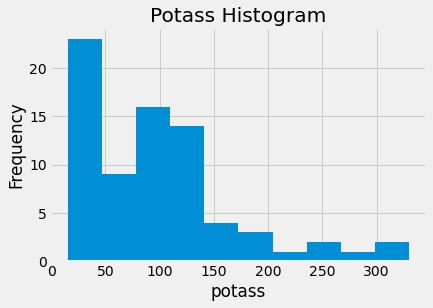

In [55]:
# Constructing a Histogram using 'potass' column

plt.hist(cereals.potass)
plt.title('Potass Histogram')
plt.xlabel('potass')
plt.ylabel('Frequency')
plt.savefig('plots/10.potass_hist.png')

In [56]:
# From the above histogram we can see that 'potass' data is right skewed.
# A "skewed right" distribution is one in which the tail is on the right side. 

# Here we cannot use the mean to fill the missing values.

# The mode best reflects the central tendency. Mode is the most frequent value in our data set.
# But when it comes to continuous data then mode can create ambiguities. There might be more than one mode or (rarely)
# none at all if none of the values are repeated. Mode is thus used to impute missing values in columns which are 
# categorical in nature.

# After mode, it is the median that reflects the central tendency the best. 
# Which implies that for continuous data, the use of the median is better than mean! 
# Median is the middle score of data-points when arranged in order. And unlike the mean, 
# the median is not influenced by outliers of the data set 

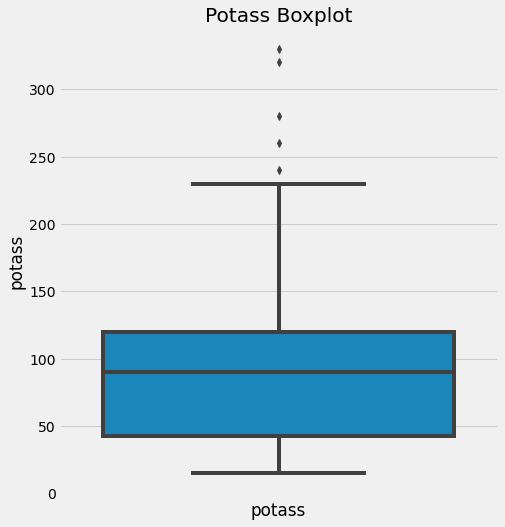

In [57]:
# Constructing a boxplot using 'potass' data.

plt.figure(figsize=(7,8))
sns.boxplot(y=cereals.potass)
plt.title('Potass Boxplot')
plt.xlabel('potass')
plt.savefig('plots/11.potass_box_with_outliers.jpg')

In [58]:
# As we can see from the boxplot there are outliers present.

# Since we are using the median value to impute missing value, there is no need to remove the outliers before
# filling the missing values.

# But here we are removing the outliers, just to have a clean data.

In [59]:
# To remove the outliers we need to find the upper range of the data.

# To find the upper range we have a formula [upper_range = Q3+(1.5 * IQR)]

# IQR is the Inter Quartile Range which is equal to third quartile(75%) minus first quartile(25%) ie IQR = Q3-Q1

# We can derive the Q1 and Q3 values from .describe() method.

cereals.potass.describe()

count     75.000000
mean      98.666667
std       70.410636
min       15.000000
25%       42.500000
50%       90.000000
75%      120.000000
max      330.000000
Name: potass, dtype: float64

In [60]:
# Selecting the 25% from the .describe() method and assigning it to Q1 variable
Q1 = cereals.potass.describe().loc['25%']

# Selecting the 75% from the .describe() method and assigning it to Q3 variable
Q3 = cereals.potass.describe().loc['75%']

# Finding the IQR
IQR = Q3-Q1

# Finding the upper range
upper_range = Q3+(1.5*IQR)

In [61]:
upper_range

236.25

In [62]:
# Here the potass column is located where the values in that column are higher than upper range(236.25). These values are
# the outliers. After locating them we are changing that values to the upper_range.

# The code inside the square brackets [cereals.potass>upper_range,'potass'] will give us a boolean output. Then this output
# is indexed to the cereals dataframe to find out the outliers.

cereals.loc[cereals.potass>upper_range,'potass'] = upper_range

# With loc and iloc you can do practically any data selection operation on DataFrames you can think of.
# loc is label-based, which means that you have to specify rows and columns based on their row and column labels.
# iloc is integer index based, so you have to specify rows and columns by their integer index.

In [63]:
# Checking to see if the outliers are removed or not

# This code will print if there are any values(outliers) greater than upper range.
print('Values greater than upper range: ',cereals.potass.loc[cereals.potass>upper_range])
print('\n')

# This code will print the values which we canged from outliers to upper range.
print('Values equal to upper range: ',cereals.potass.loc[cereals.potass==upper_range])

Values greater than upper range:  Series([], Name: potass, dtype: float64)


Values equal to upper range:  0     236.25
2     236.25
3     236.25
52    236.25
58    236.25
Name: potass, dtype: float64


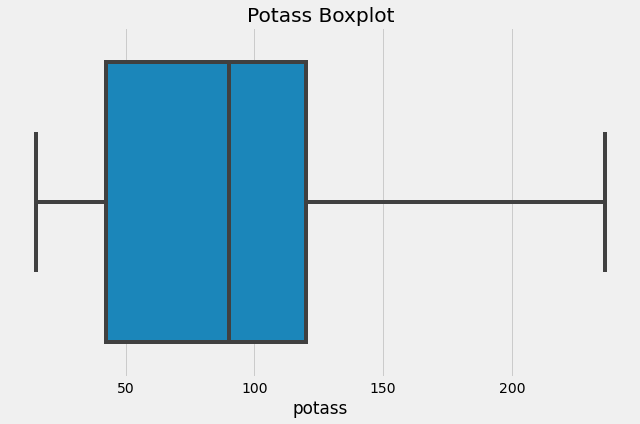

In [64]:
# Constructing a boxplot to see if there are any outliers.

plt.figure(figsize=(10,6))
sns.boxplot(x=cereals.potass)
plt.title('Potass Boxplot')
plt.xlabel('potass')
plt.savefig('plots/12.potass_box_without_outliers.jpg')

In [65]:
# Now we can start filling the missing values in 'potass' column.


# The data is concentrated on the left side so 'potass' column is right skewed
# therefore we can use median value here to fill the missing values

In [66]:
# for the 'potass' column the median value is 90.

cereals.potass.describe()

count     75.000000
mean      95.350000
std       61.435379
min       15.000000
25%       42.500000
50%       90.000000
75%      120.000000
max      236.250000
Name: potass, dtype: float64

In [67]:
# But for some more accuracy in filling the missing values we can groupby the data according to 'mfr' and find 
# the median in each group and fill accordingly.

cereals.groupby('mfr').median().potass

mfr
A     95.0
G     80.0
K     60.0
N    120.0
P     90.0
Q     72.5
R    115.0
Name: potass, dtype: float64

In [68]:
# Here we have two missing values which have the 'mfr' as 'R' and 'N'.
cereals[cereals.potass.isnull()]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.0,1.00,64.533816


In [69]:
cereals.groupby('mfr').median().potass.loc['N']

120.0

In [70]:
# We need to map the median values of 'R' and 'N' for potass column and fill the missing values accordingly

In [71]:
# This fuction will accept the cereals dataframe and fill the null values in potass column

def fill_na_potass(df):
    # This for loop will loop through all the required 'mfr', here it is 'N' and 'R'
    for i in ['N', 'R']:
        df.potass.fillna(df.groupby('mfr').median().potass.loc[i],inplace=True)
        
# The advantage of this function is, if there are more null values in the potass column and those null values comes
# under different manufacurer(not just 'N' and 'R') then we can tweek this function a little bit and it will fill all the
# null values in the potass column according to the 'mfr' column.

# If there are more null values in the potass column use this function:

# def fill_na_potass(df):
#     # This for loop will loop through all the unique values in 'mfr' column
#     for i in df.mfr.unique():
#         df.potass.fillna(df.groupby('mfr').median().potass.loc[i],inplace=True)

In [72]:
fill_na_potass(cereals)

In [73]:
cereals.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

## Feature engineering

In [74]:
# We are creating a new ratings column(rating_cat) by converting the ratings column to a categorical variable

# Bin values into discrete intervals.

# Use cut when you need to segment and sort data values into bins. This function is also useful for going from a
# continuous variable to a categorical variable. 

# For example, cut could convert ages to groups of age ranges. 

# Supports binning into an equal number of bins, or a pre-specified array of bins.


bins = [0,25,50,75,100]
names = ['below_avg','average','above_avg','high']

cereals['rating_cat'] = pd.cut(cereals['rating'], bins, labels=names)

In [75]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,rating_cat
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,236.25,25,3,1.0,0.33,68.402973,above_avg
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,0,3,1.0,1.00,33.983679,average
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,236.25,25,3,1.0,0.33,59.425505,above_avg
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,236.25,25,3,1.0,0.50,93.704912,high
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,120.00,25,3,1.0,0.75,34.384843,average


## Relation between columns

In [76]:
# Compute pairwise correlation of columns, excluding NA/null values.

cereals.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.260125,0.566954,0.024319,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.048500,-0.288761,0.576383,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.307435,0.297400,0.246996,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.309871,0.063316,-0.067110,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.381031,-0.139374,0.841188,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.260125,-0.048500,-0.307435,0.309871,-0.381031,1.000000,-0.466370,-0.303624,0.229670,-0.173259,0.139959,0.371867,0.081781
sugars,0.566954,-0.288761,0.297400,0.063316,-0.139374,-0.466370,1.000000,0.028696,0.101067,0.071889,0.456172,-0.046791,-0.763709
potass,0.024319,0.576383,0.246996,-0.067110,0.841188,-0.303624,0.028696,1.000000,-0.004823,0.391324,0.475735,-0.479063,0.360636
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.229670,0.101067,-0.004823,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.173259,0.071889,0.391324,0.299262,1.000000,0.190762,-0.335269,0.025159


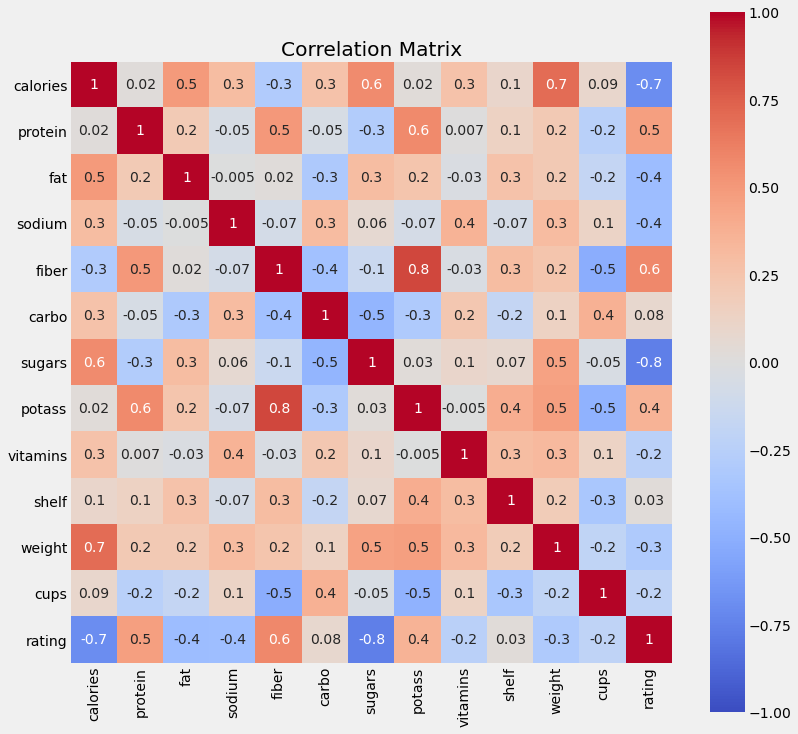

In [77]:
plt.figure(figsize=(12,12))

# By passing corretalion matrix into a heatmap we can visualize the correlation between columns.
sns.heatmap(cereals.corr(),annot=True,fmt='.1g',vmin=-1,cmap='coolwarm',square=True)
plt.title('Correlation Matrix')

#_______annot_______
# For an even easier interpretation, an argument called annot=True should be passed as well, which helps display
# the correlation coefficient.

#_______fmt______
# There are times where correlation coefficients may be running towards 5 decimal digits. A good trick to reduce 
# the number displayed and improve readability is to pass the argument fmt =’.3g'or fmt = ‘.1g'

#_______vmin,vmax,center________
# There are times where the correlation matrix bar doesn’t start at zero, a negative number, or end at a
# particular number of choice—or even have a distinct center. All this can be customized by specifying these
# three arguments: vmin, which is the minimum value of the bar; vmax, which is the maximum value of the bar; and center

plt.savefig('plots/13.corr_heatmap.png')

#### calories vs fat

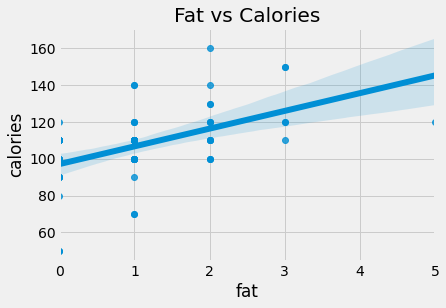

In [78]:
# Plot data and a linear regression model fit.

sns.regplot(x='fat',y='calories',data=cereals)
plt.title('Fat vs Calories')

# 'Calories' and 'fat' have a positive correlation
# But 'fat' is not a continuous variable

# As the fat in the cereals increase, calories also increases.

plt.savefig('plots/14.calories_vs_fat.png')

#### calories vs fiber

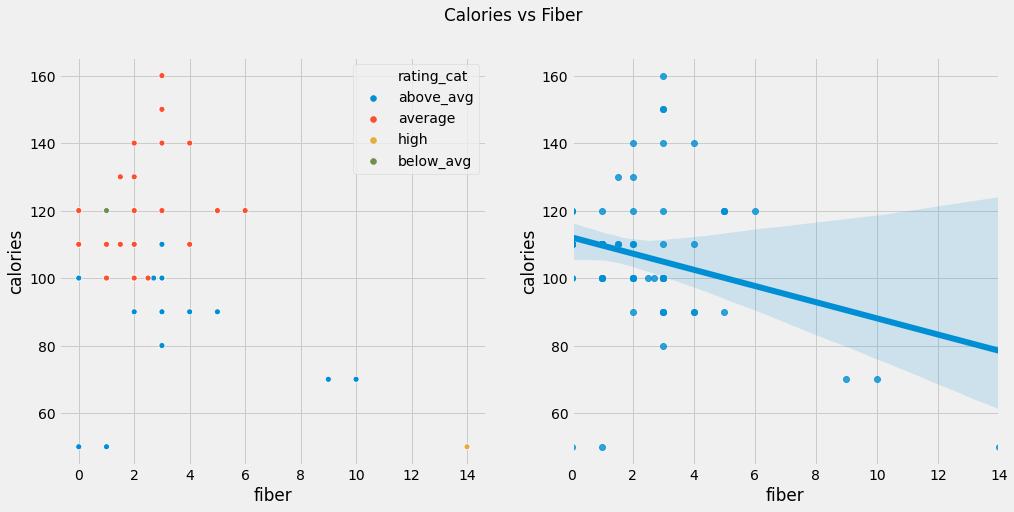

In [79]:
# Here a subplot with 2 plots are created.

# The 'fig' is a matplotlib.figure.Figure object, this 'fig' is the whole figure(both the subplots)
# We can use this 'fi'g to give a super title(suptitle) to both the subplots.

# The 'axes' is a numpy array with the subplots inside that array. We can select each of the subplots through array indexing.
# If we want to select the 1st plot use axes[0] and to select second plot use axes[1].
fig, axes = plt.subplots(1,2,figsize=(15,7))

# Here using the 'fig' to give a supertitle
fig.suptitle('Calories vs Fiber')

# Draw a scatter plot with possibility of several semantic groupings.
# Here we are ploting a scatterplot on axes[0] subplot, by giving an argument inside the scatterplot as ax=axes[0].
# On the x axis we are ploting 'fiber' and on the y axis 'calories'.
# hue is used to group the data which we have plotted. Here we are grouoping by 'rating_col'(a new variable we created earlier)

sns.scatterplot(ax=axes[0],x='fiber',y='calories',hue='rating_cat',data=cereals)

# On the next axes(axes[1]) we are plotting a regression plot. This plot will draw a regression line through the data.

sns.regplot(ax=axes[1],x='fiber',y='calories',data=cereals)

# There is not much correlation between calories and fiber

plt.savefig('plots/15.calories_vs_fiber.png')

#### calories vs weight

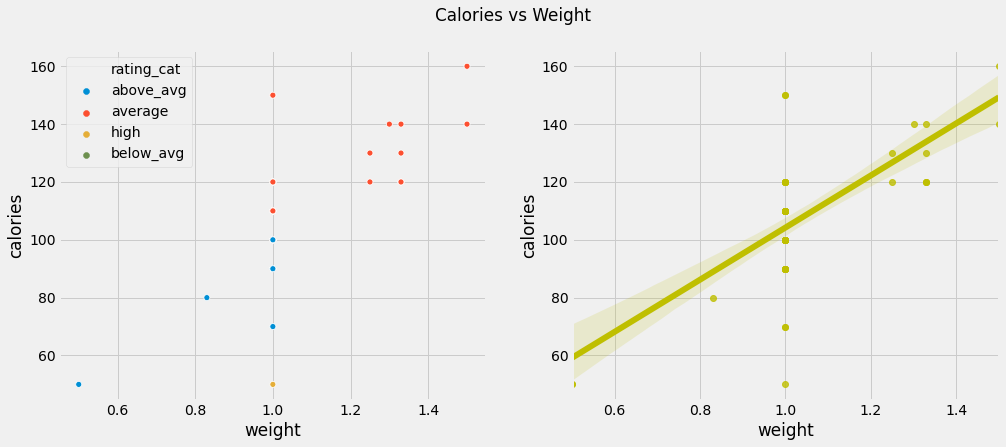

In [80]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Calories vs Weight')

sns.scatterplot(ax=axes[0],x='weight',y='calories',hue='rating_cat', data=cereals)

sns.regplot(ax=axes[1],x='weight',y='calories',data=cereals,color='y')

# calories and weight are positively correlated

# Also we can see that even though weight increases the rating is not increasing(Quality is better than Quantity)

plt.savefig('plots/16.calories_vs_weight.png')

#### calories vs rating

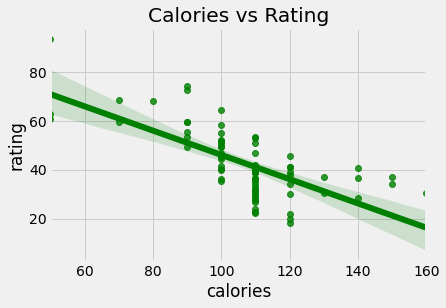

In [81]:
sns.regplot(x='calories', y='rating', data=cereals, color='g')
plt.title('Calories vs Rating')

# From this regression plot we can see that, as the calories increase ratings actually decreases.

# Which means people actually likes cereals with low calories.
plt.savefig('plots/17.calories_vs_Rating.png')

#### protein vs rating

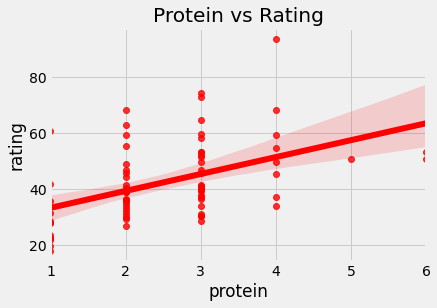

In [82]:
sns.regplot(x='protein', y='rating', data=cereals, color='r')

plt.title('Protein vs Rating')

# As protein level increase ratings also increases.
plt.savefig('plots/18.protein_vs_rating.png')

#### fiber vs potass

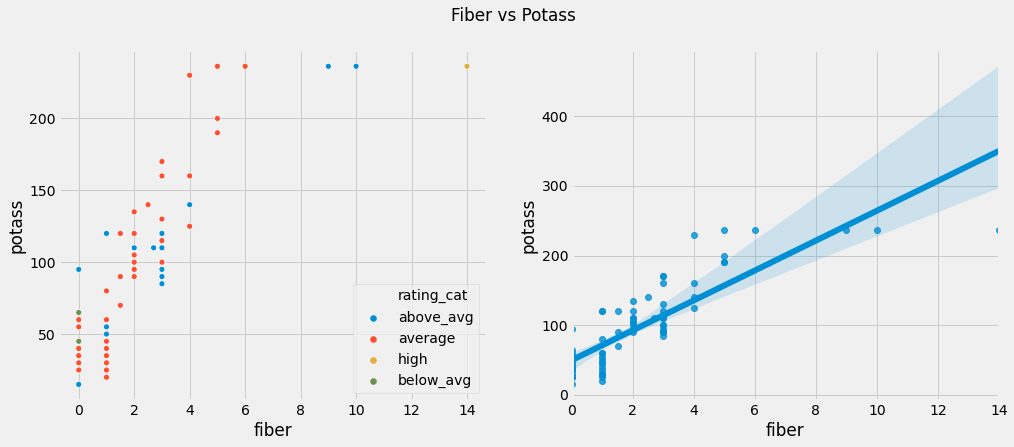

In [83]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Fiber vs Potass')

sns.scatterplot(ax=axes[0], x='fiber',y='potass',hue='rating_cat',data=cereals)

sns.regplot(ax=axes[1], x='fiber', y='potass', data=cereals)

# A high correlation is there between fiber and potass.
plt.savefig('plots/19.fiber_vs_potass.png')

#### sugar vs calories

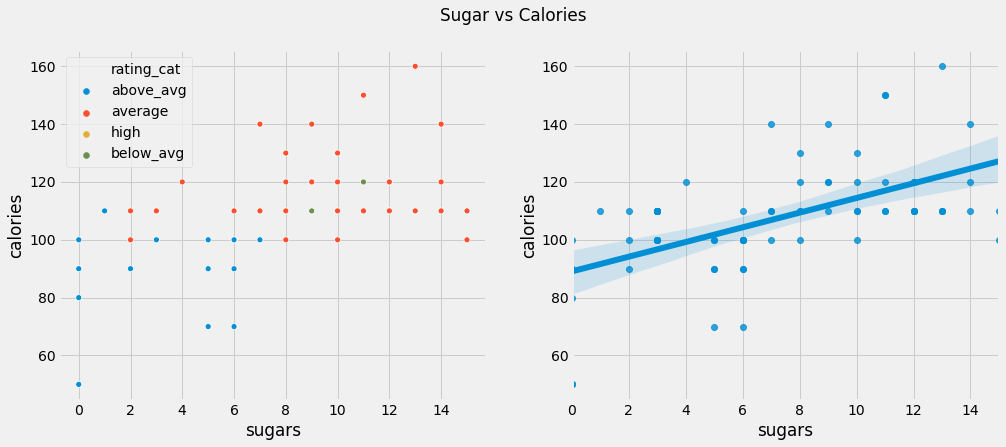

In [84]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Sugar vs Calories')


sns.scatterplot(ax=axes[0], x='sugars', y='calories', hue='rating_cat', data=cereals)

sns.regplot(ax=axes[1], x='sugars', y='calories', data=cereals)

# As the sugar increases, calories also increases, but ratings are decreasing as sugar and calories increases.

# Since cereal is a daily breakfast, people look in to the amount of sugars and calories in it. As we know more
# sugar in our diet leads to diabaties and weight gain.

# Hence the rating of those cereals with high sugar content is lower.
plt.savefig('plots/20.sugar_vs_calories.png')

#### Rating based on shelf

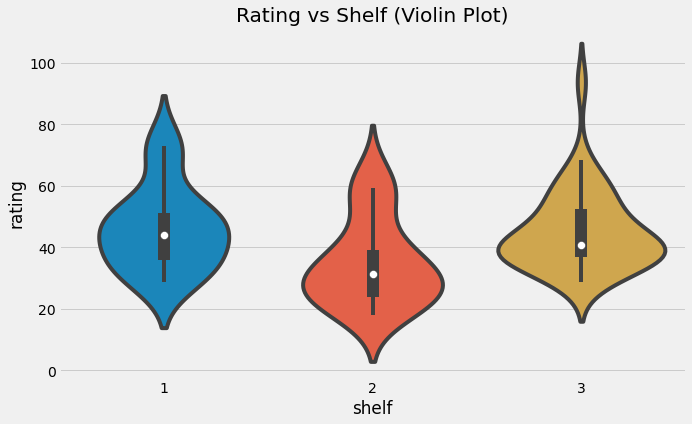

In [85]:
# Lets see if the placement of cereals on a particular shelf affects its rating.

plt.figure(figsize=(10,6))

# Violin Plot : Draw a combination of boxplot and kernel density estimate.

# A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data
# across several levels of one (or more) categorical variables such that those distributions can be compared. 
# Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features 
# a kernel density estimation of the underlying distribution.

sns.violinplot(x='shelf',y='rating',data=cereals)
plt.title('Rating vs Shelf (Violin Plot)')

# We can see that rating is overall high for the cereals place on shelf 3. The cereals placed on shelf 2 have the
# lowest rating. And the rating of cereals placed on shelf 1 falls in the middle.
plt.savefig('plots/21.rating_vs_shelf_violin.png')

## Pair plot

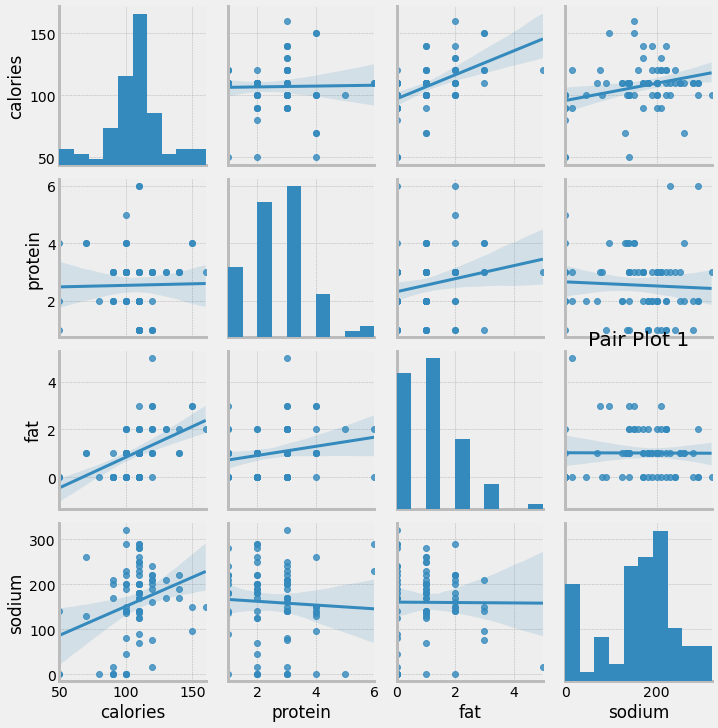

In [86]:
# Pair Plot : Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data will by shared across 
# the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: 
#     a univariate distribution plot is drawn to show the marginal distribution of the data in each column.


with plt.style.context('bmh'):
    sns.pairplot(cereals.iloc[:,:7],kind='reg')
    
plt.title('Pair Plot 1')
# Here we are indexing first 6 columns(4 numerical columns). 
plt.savefig('plots/22.pair_plot1.png')

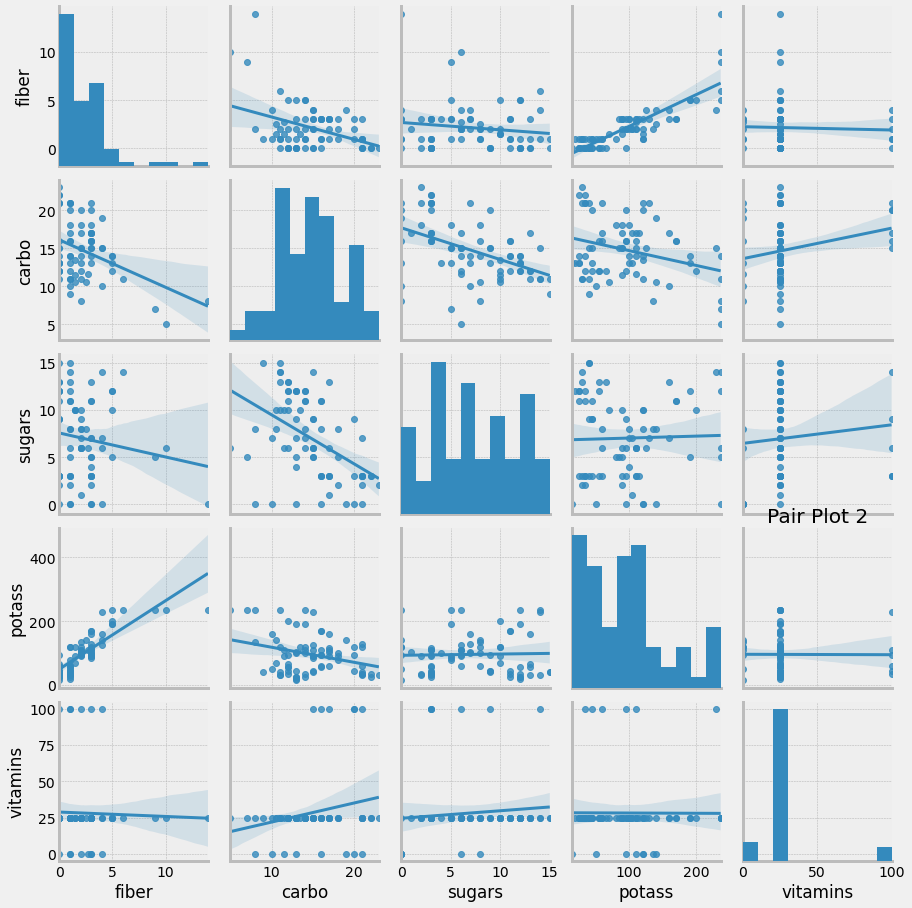

In [87]:
with plt.style.context('bmh'):
    sns.pairplot(cereals.iloc[:,7:12],kind='reg')
    
plt.title('Pair Plot 2')
# Here we are indexing from 7th column to 11th column(which contain 5 numerical columns)
plt.savefig('plots/23.pair_plot2.png')

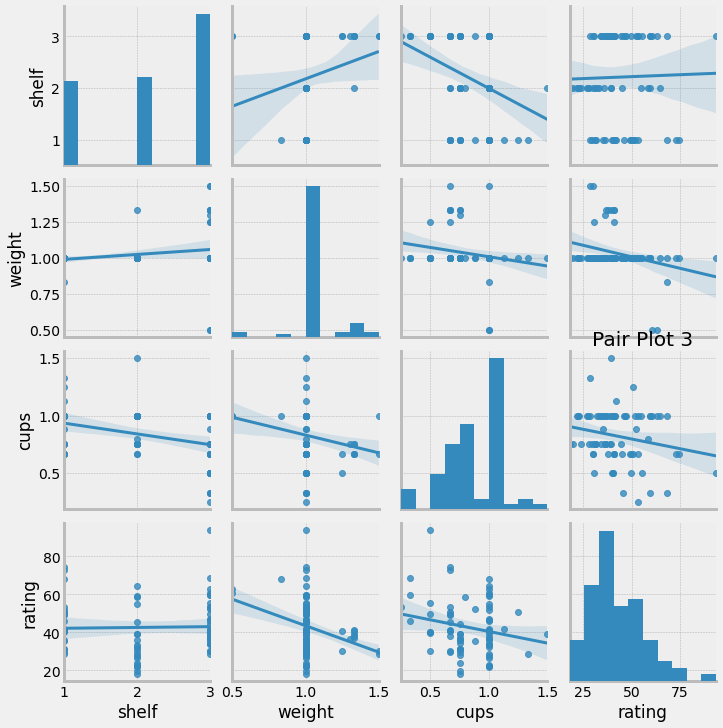

In [88]:
with plt.style.context('bmh'):
    sns.pairplot(cereals.iloc[:,12:],kind='reg')
plt.title('Pair Plot 3')
    
# Here we are indexing the rest of the columns.
plt.savefig('plots/24.pair_plot3.png')

In [89]:
# From the pair plots constructed above we can see the relation between all the numerical variables
# with each other.

## Conclusion
***

1. The features which affects the rating positively are
    * protein
    * fiber
    * potass
2. The features which affects the rating negetively are
    * calories
    * fat
    * sodium
    * sugars
3. All other features only mildly affects the rating of the cereals.